In [ ]:
!pip install tensorflow-gpu==2.8.0
!pip install keras==2.2.5
!pip install h5py==2.10.0 --force-reinstall
!pip install mrcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 48.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: Keras 2.2.5
    Uninstalling Keras-2.2.5:
      Successfully uninstalled Keras-2.2.5
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.0
    Uninstalling tensorboard-2.12.0:
      Successfully uninstalled tensorboard-2.12.0
ERROR: pip's dependency resolver does not currently tak

In [ ]:
#clonamos las carpetas que necesitamos.
!git clone https://github.com/matterport/Mask_RCNN.git
%cd Mask_RCNN/
!python setup.py install
!wget https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5

%cd ..
!git clone https://github.com/suso86/Deteccion-Automatica-Pinturas.git

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 137.67 MiB | 20.61 MiB/s, done.
Resolving deltas: 100% (558/558), done.
/content/Mask_RCNN
/usr/local/lib/python3.10/dist-packages/setuptools/dist.py:755: SetuptoolsDeprecationWarning: Invalid dash-separated options
!!

        ********************************************************************************
        Usage of dash-separated 'description-file' will not be supported in future
        versions. Please use the underscore name 'description_file' instead.

        This deprecation is overdue, please update your project and remove deprecated
        calls to avoid build errors in the future.

        See https://setuptools.pypa.io/en/latest/userguide/declarative_config.html for details.
        ********************************************************************************

!!
  opt = self.warn_dash_deprecation(

In [ ]:
#%cd /content/Deteccion-Automatica-Pinturas

#Importamos todas las librerias que necesitamos
%matplotlib inline
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import skimage
import cv2
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log
import daño
import Mivisualize
#Mask_RCNN.

ROOT_DIR = os.path.abspath("../")
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
MODEL_WEIGHTS_PATH = ROOT_DIR +"/daño_mask_rcnn_coco.h5"

ImportError: cannot import name 'Iterable' from 'collections' (/usr/lib/python3.10/collections/__init__.py)

In [ ]:
config = daño.CustomConfig()
DAÑO_DIR = "/content/Deteccion-Automatica-Pinturas"
#val
dataset = daño.CustomDataset()
dataset.load_custom(DAÑO_DIR, "val")
dataset.prepare()
print("Images value: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

#train
dataset_train = daño.CustomDataset()
dataset_train.load_custom(DAÑO_DIR, "train")
dataset_train.prepare()
print("Images train: {}\nClasses: {}".format(len(dataset_train.image_ids), dataset_train.class_names))

Images value: 10
Classes: ['BG', 'daño']
Images train: 15
Classes: ['BG', 'daño']


In [ ]:
# cambios para la inferencia.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    # Ejecuta la detección en una imagen a la vez
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTA

In [ ]:
# set target device
# Cambiamos el dispositivo objetivo
DEVICE = "/gpu:0"  # /cpu:0 or /gpu:0

#Creamos el modelo de inferencia para las pruebas
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


In [ ]:
import json
with open('/content/Deteccion-Automatica-Pinturas/train/via_region_data.json') as file:
    data = json.load(file)

with open('/content/Deteccion-Automatica-Pinturas/val/via_region_data.json') as file:
    data_val = json.load(file)

def esta_train(cuadro):
  train_dir =  '/content/Deteccion-Automatica-Pinturas/train/'
  esta = False
  for i in dataset_train.image_ids:
    if dataset_train.image_reference(i) == train_dir + cuadro:
      esta = True
  return esta

# Función para indicar el número de daños cogidos en un cuadro determinado
# Entrada: Nombre del cuadro
# Salida: Número de daños recogidos
def Daños_cogidos(nombre_cuadro):
  data_actual = data_val
  if esta_train(nombre_cuadro):
    data_actual = data
  daños=0
  for clave in data_actual:
    if data_actual[clave]['filename'] == nombre_cuadro:
      for clave2 in data_actual[clave]['regions']:
        for clave3 in data_actual[clave]['regions'][clave2]['region_attributes']:
          if clave3 == 'damage':
            daños+=1

  return daños




print(Daños_cogidos('003.jpg'))

FileNotFoundError: ignored

Loading weights  /content/mask_rcnn_daño_0005 (7).h5
Processing 1 images
image                    shape: (4598, 3770, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  111.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 4598.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Vemos cuanto es N: 49
Numero de poligonos recorridos: 49


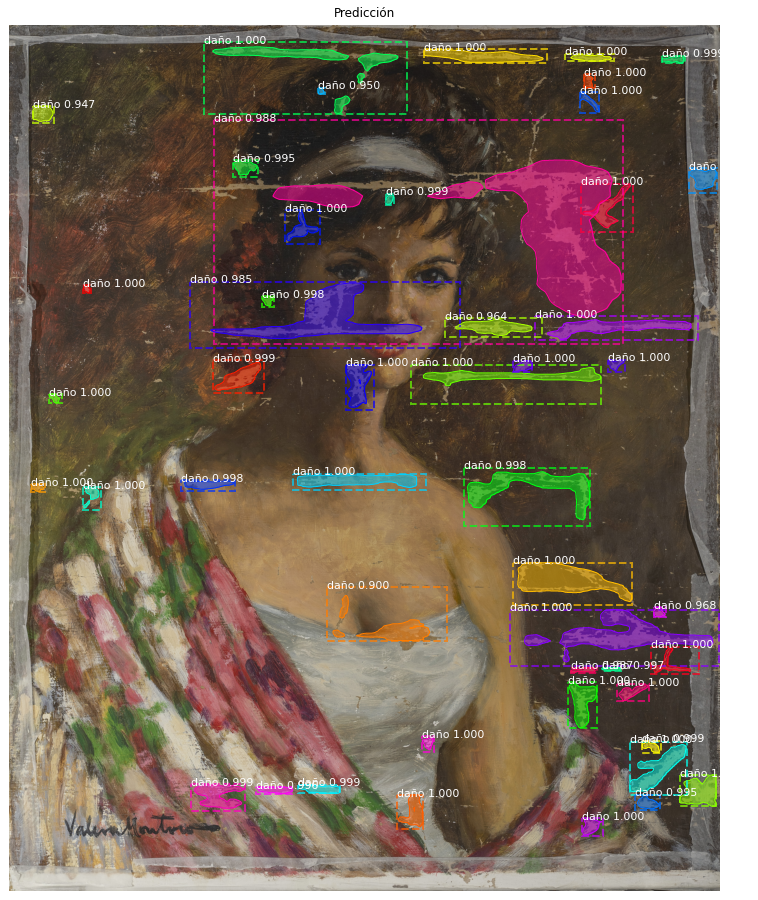

In [ ]:
############################################################
#  Ejemplo de obtención de polígonos
############################################################
# Cargamos el peso
weights_path = "/content/mask_rcnn_daño_0005 (7).h5"
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

real_test_dir = '/content/Deteccion-Automatica-Pinturas/train/'
image_paths = []
for filename in os.listdir(real_test_dir):
    if os.path.splitext(filename)[1].lower() in ['.png', '.jpg', '.jpeg']:
      if filename == '001.jpg':
        image_paths.append(os.path.join(real_test_dir, filename))

for image_path in image_paths:
    img = skimage.io.imread(image_path)
    img_arr = np.array(img)
    results = model.detect([img_arr], verbose=1)
    r = results[0]

    poligonos = Mivisualize.display_instances(img, r['rois'], r['masks'], r['class_ids'],dataset_train.class_names,
                            r['scores'], title="Predicción")


In [ ]:
#Sacamos las coordenadas de los daños que tenemos en nuestro json

def CoordeJson(cuadro):
  #Primero vemos en que json se encuentra.
  data_actual = data_val
  if esta_train(cuadro):
    data_actual = data
  # Una vez que tenemos el json, accedemos a las coordenadas de cada daño y la guardamos en una lista
  poligonos = []
  for clave in data_actual:
    if data_actual[clave]['filename'] == cuadro:
      for clave2 in data_actual[clave]['regions']:
        for clave3 in data_actual[clave]['regions'][clave2]['region_attributes']:
          if clave3 == 'damage':
            coordenadas_poligono = []
            for i in range(len(data_actual[clave]['regions'][clave2]['shape_attributes']['all_points_x'])):
              x = data_actual[clave]['regions'][clave2]['shape_attributes']['all_points_x'][i]
              y = data_actual[clave]['regions'][clave2]['shape_attributes']['all_points_y'][i]
              aux = [x,y]
              coordenadas_poligono.append(aux)
            poligonos.append(coordenadas_poligono)
      break
  # Devolvemos una lista que contiene todas las coordenadas de todos los daños del cuadro
  return poligonos

#CoordeJson('Pintura_0.20.jpg')

In [ ]:
#Cálculo del área de polígonos irregulares
def AreaPol(coordenadas):

  n = len(coordenadas)

  x= []
  y= []

  for i in range(n):
    x.append(float(coordenadas[i][0]))
    y.append(float(coordenadas[i][1]))

  #Algoritmo para la determinacion del area
  sum = x[0]*y[n-1] - x[n-1]*y[0]

  for i in range(n-1):
    sum += x[i+1]*y[i] - x[i]*y[i+1]

  area = sum/2

  return area

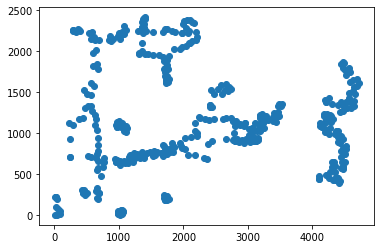

In [ ]:
#Vamos a intentar mostrar las coordenadas que hemos recogido de nuestro .json, es decir las coordenadas que hemos marcado
# Importar el módulo pyplot con el alias plt
import matplotlib.pyplot as plt
corde_poli = CoordeJson('Pintura_0.5.jpg')
# Crear la figura y los ejes
fig, ax = plt.subplots()
x = []
y = []
for i in corde_poli:
  for j in i:
    x.append(j[0])
    y.append(j[1])
# Dibujar puntos
ax.scatter(x , y)
# Mostrar el gráfico
plt.show()

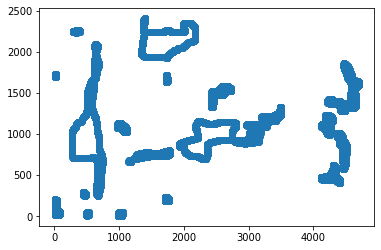

In [ ]:
#Vamos a intentar mostrar las coordenadas que hemos recogido con nuestro algoritmo
# Importar el módulo pyplot con el alias plt
import matplotlib.pyplot as plt
# Crear la figura y los ejes
fig, ax = plt.subplots()
x = []
y = []
for i in poligonos:
  coordenadas_encontradas = i[1].get_xy()
  for j in coordenadas_encontradas:
    x.append(j[0])
    y.append(j[1])
# Dibujar puntos
ax.scatter(x , y)
# Mostrar el gráfico
plt.show()

In [ ]:
# Vemos si los resultados de las áreas tienen algo en común
# polis = CoordeJson('001.jpg')
polis = CoordeJson('Pintura_0.5.jpg')
areas_encontradas = []
areas_recogidas = []
print("Poligonos encontrados ------------------------ Poligonos recogidos")
for i in range(len(polis)):
  if(len(poligonos)>i):
    poligono_encontrado = poligonos[i][1]
    coordenadas_encontradas = poligono_encontrado.get_xy()
    #coordenadas_encontradas = np.fliplr(coordenadas_encontradas)
    area_encontrada = abs(AreaPol(coordenadas_encontradas))

  else:
    area_encontrada = 0

  area_recogida = abs(AreaPol(polis[i]))

  areas_encontradas.append(area_encontrada)
  areas_recogidas.append(area_recogida)

areas_encontradas.sort()
areas_recogidas.sort()
for i in range(len(areas_encontradas)):
  print("   ",areas_encontradas[i], "                                      " , areas_recogidas[i])


# Vamos a calcular el porcentaje de los poligonos encontrados respecto a los recogidos.
suma_recogidos = 0
suma_encontrados = 0

for i in range(len(areas_encontradas)):
  suma_encontrados += areas_encontradas[i]
  suma_recogidos += areas_recogidas[i]


porcentaje = (suma_encontrados/suma_recogidos)*100

print("\nSuma total de las áreas de los poligonos encontrados: ", suma_encontrados)
print("\nSuma total de las áreas de los poligonos recogidos: ", suma_recogidos)
print("\nEl porcentaje de poligonos encontrados es", porcentaje, "% respecto a los poligonos recogidos")

In [ ]:
# Obtenemos las áreas que encontramos y la sumamos
areas_encontradas = []
for pl in poligonos:
  poligono_encontrado = pl[1]
  coordenadas_encontradas = poligono_encontrado.get_xy()
  area_encontrada = abs(AreaPol(coordenadas_encontradas))
  areas_encontradas.append(area_encontrada)

suma_areas_encontradas = 0
for i in areas_encontradas:
  suma_areas_encontradas += i

# Obtenemos las áreas que hemos etiquetado y la sumamos
polis = CoordeJson('001.jpg')
areas_etiquetadas = []
for i in range(len(polis)):
  area_recogida = abs(AreaPol(polis[i]))
  areas_etiquetadas.append(area_recogida)

suma_areas_etiquetadas = 0
for i in areas_etiquetadas:
  suma_areas_etiquetadas += i

porcentaje = (suma_areas_encontradas*100)/suma_areas_etiquetadas

print("\nSuma total de las áreas de los poligonos encontrados: ", suma_areas_encontradas)
print("\nSuma total de las áreas de los poligonos recogidos: ", suma_areas_etiquetadas)
print("\nEl porcentaje de poligonos encontrados es", porcentaje, "% respecto a los poligonos etiquetados")



Suma total de las áreas de los poligonos encontrados:  1204684.5

Suma total de las áreas de los poligonos recogidos:  1273302.0

El porcentaje de poligonos encontrados es 94.61105849201525 % respecto a los poligonos etiquetados


In [ ]:
json_str2 = json.dumps(data, indent = 2)
print(json_str2)

In [ ]:
# PRUEBA PARA VER EL TAMAÑO DE UNA IMÁGEN
imagen = skimage.io.imread('/content/Deteccion-Automatica-Pinturas/train/Pintura_0.5.jpg')

# Obtenemos las áreas que encontramos y la sumamos
areas_encontradas = []
for pl in poligonos:
  poligono_encontrado = pl[1]
  coordenadas_encontradas = poligono_encontrado.get_xy()
  area_encontrada = abs(AreaPol(coordenadas_encontradas))
  areas_encontradas.append(area_encontrada)

suma_areas = 0
for i in areas_encontradas:
  suma_areas += i

tamaño = imagen.shape[0]*imagen.shape[1]
zona_no_dañada = tamaño - suma_areas
zona_dañada = tamaño - zona_no_dañada
porcentaje = (zona_dañada * 100)/tamaño


print("Tamaño del cuadro:", tamaño)
print("Suma de las áreas que hemos encontrados:",suma_areas)
print("Zona no dañada:",zona_no_dañada)
print("Zona dañada:",zona_dañada)
print("Porcentaje de daño que presenta el cuadro:",porcentaje,"%")


Tamaño del cuadro: 12145799
Suma de las áreas que hemos encontrados: 954105.0
Zona no dañada: 11191694.0
Zona dañada: 954105.0
Porcentaje de daño que presenta el cuadro: 7.855432153948867 %


In [ ]:
#Sprint 1 : Prueba: Mostrar por pantalla algunos cuadros con los daños obtenidos para ver el conjunto de datos que he recogido.
def Sprint1():
  # Cogemos dos ids de imágenes de la carpeta train y dos de la carpeta val
  image_ids = np.random.choice(dataset.image_ids, 2)
  x = np.random.choice(dataset_train.image_ids,2)
  image_ids = np.append(image_ids,x)
  print(image_ids)

  #Variable para poner dos ejemplos de la carpeta train y dos ejemplos para poner de la  carpeta val
  cambio = 0
  aux = 0
  for image_id in image_ids:
    if cambio == 0:
      image = dataset.load_image(image_id)
      mask, class_ids = dataset.load_mask(image_id)
      # Compute Bounding box
      bbox = utils.extract_bboxes(mask)

      # Display image and additional stats
      print("image_id ", image_id, dataset.image_reference(image_id))
      log("image", image)
      log("mask", mask)
      log("class_ids", class_ids)
      log("bbox", bbox)
      # Display image and instances
      visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names, figsize=(10,10))
      aux += 1

    else:
      image = dataset_train.load_image(image_id)
      mask, class_ids = dataset_train.load_mask(image_id)
      # Compute Bounding box
      bbox = utils.extract_bboxes(mask)

      # Display image and additional stats
      print("image_id ", image_id, dataset_train.image_reference(image_id))
      log("image", image)
      log("mask", mask)
      log("class_ids", class_ids)
      log("bbox", bbox)
      # Display image and instances
      visualize.display_instances(image, bbox, mask, class_ids, dataset_train.class_names, figsize=(10,10))
      aux += 1

    if aux == 2:
      if cambio == 1:
        cambio = 0
      else:
        cambio = 1

#Ejecución de la prueba
Sprint1()

In [ ]:
#Sprint 2 : Prueba : Validación del algoritmo con el primer entrenamiento realizado.

def Sprint2(cuadro):
  # Cargamos el peso
  weights_path = "/content/mask_rcnn_daño_0010.h5"
  print("Loading weights ", weights_path)
  model.load_weights(weights_path, by_name=True)

  # Comprobamos la eficiencia del entrenamiento
  train_dir = '/content/Deteccion-Automatica-Pinturas/train/'
  #Primero mostramos el cuadro con los daños que hemos recogido
  image_id = 0
  for i in dataset_train.image_ids:
    if dataset_train.image_reference(i) == train_dir + cuadro:
      image_id = i

  image, image_meta, gt_class_id, gt_bbox, gt_mask =\
      modellib.load_image_gt(dataset_train, config, image_id, use_mini_mask=False)
  info = dataset_train.image_info[image_id]
  print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id,
                                        dataset_train.image_reference(image_id)))

  # Run object detection
  results = model.detect([image], verbose=1)

  # Display results
  r = results[0]
  visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'],
                              dataset_train.class_names, r['scores'],
                              title="Predictions", figsize=(10,10))
  log("gt_class_id", gt_class_id)
  log("gt_bbox", gt_bbox)
  log("gt_mask", gt_mask)

#Ejecución de la prueba
Sprint2('Pintura_0.13.jpg')

In [ ]:
# Sprint 3: Prueba : Comparamos el número de daños obtenidos con el entrenamiento y el número de daños que hemos recogido de un cuadro dado,
# si se obtiene el 90% del número de daños que hemos recogido el algoritmo está bien.
def Sprint3(cuadro):
  # Cargamos el peso
  weights_path = "/content/mask_rcnn_daño_0005 (6).h5"
  print("Loading weights ", weights_path)
  model.load_weights(weights_path, by_name=True)

  train_dir = '/content/Deteccion-Automatica-Pinturas/train/'
  #Primero mostramos el cuadro con los daños que hemos recogido
  image_id = 0
  for i in dataset_train.image_ids:
    if dataset_train.image_reference(i) == train_dir + cuadro:
      image_id = i

  image = dataset_train.load_image(image_id)
  mask, class_ids = dataset_train.load_mask(image_id)
  # Compute Bounding box
  bbox = utils.extract_bboxes(mask)

  # Display image and additional stats
  print("image_id ", image_id, dataset_train.image_reference(image_id))
  log("image", image)
  log("mask", mask)
  log("class_ids", class_ids)
  log("bbox", bbox)
  # Display image and instances
  visualize.display_instances(image, bbox, mask, class_ids, dataset_train.class_names,figsize=(10,10))

  #Luego mostramos el cuadro con los daños que se detecta con el entrenamiento
  image_paths = []
  for filename in os.listdir(train_dir):
      if os.path.splitext(filename)[1].lower() in ['.png', '.jpg', '.jpeg']:
        if filename == cuadro :
          image_paths.append(os.path.join(train_dir, filename))

  for image_path in image_paths:
      img = skimage.io.imread(image_path)
      img_arr = np.array(img)
      results = model.detect([img_arr], verbose=1)
      r = results[0]
      visualize.display_instances(img, r['rois'], r['masks'], r['class_ids'],
                              dataset_train.class_names,
                              title="Predicción",figsize=(10,10))


  #Estudio de los daños que hemos obtenido
  daños_cogidos = Daños_cogidos(cuadro)
  daños_obtenidos = 0
  for i in r['scores']:
    daños_obtenidos+=1

  #Resultados obtenidos: Interpretar que el algoritmo debe detectar un 90% minimo de daños,
  # si no obtiene ese mínimo hay que seguir entrenando.

  daños_minimos = round((90*daños_cogidos)/100)

  print("Daños recogidos: " + str(daños_cogidos))
  print("Daños obtenidos: " + str(daños_obtenidos))
  print("Daños minimos que tiene que detectar: " + str(daños_minimos))

  if daños_obtenidos < daños_minimos:
    print("Hay que seguir entrenando el algoritmo!!!")

  else:
    print("Buen entrenamiento!!!")

#Ejecución de la prueba
Sprint3('001.jpg')

In [ ]:
# Cargamos el peso
weights_path = "/content/mask_rcnn_daño_0005 (6).h5"
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

cuadro = '001.jpg'
# Comprobamos la eficiencia del entrenamiento
train_dir = '/content/Deteccion-Automatica-Pinturas/train/'
#Primero mostramos el cuadro con los daños que hemos recogido
image_id = 0
for i in dataset_train.image_ids:
  if dataset_train.image_reference(i) == train_dir + cuadro:
    image_id = i

image, image_meta, gt_class_id, gt_bbox, gt_mask =\
modellib.load_image_gt(dataset_train, config, image_id, use_mini_mask=False)
mask, class_ids = dataset_train.load_mask(image_id)
info = dataset_train.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id,
                                        dataset_train.image_reference(image_id)))

# Run object detection
results = model.detect([image], verbose=1)

# Display results
r = results[0]
bbox = utils.extract_bboxes(mask)
#visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'],
                              #dataset_train.class_names, r['scores'],
                              #title="Predictions", figsize=(10,10))

print("Número de daños cogidos:",Daños_cogidos(cuadro))
print("Número de r[rois]:", len(r['rois']))
print(bbox)



In [ ]:
json_str2 = json.dumps(data, indent = 2)
print(json_str2)

Loading weights  /content/mask_rcnn_daño_0005 (7).h5
Processing 1 images
image                    shape: (3618, 3087, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  104.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 3618.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


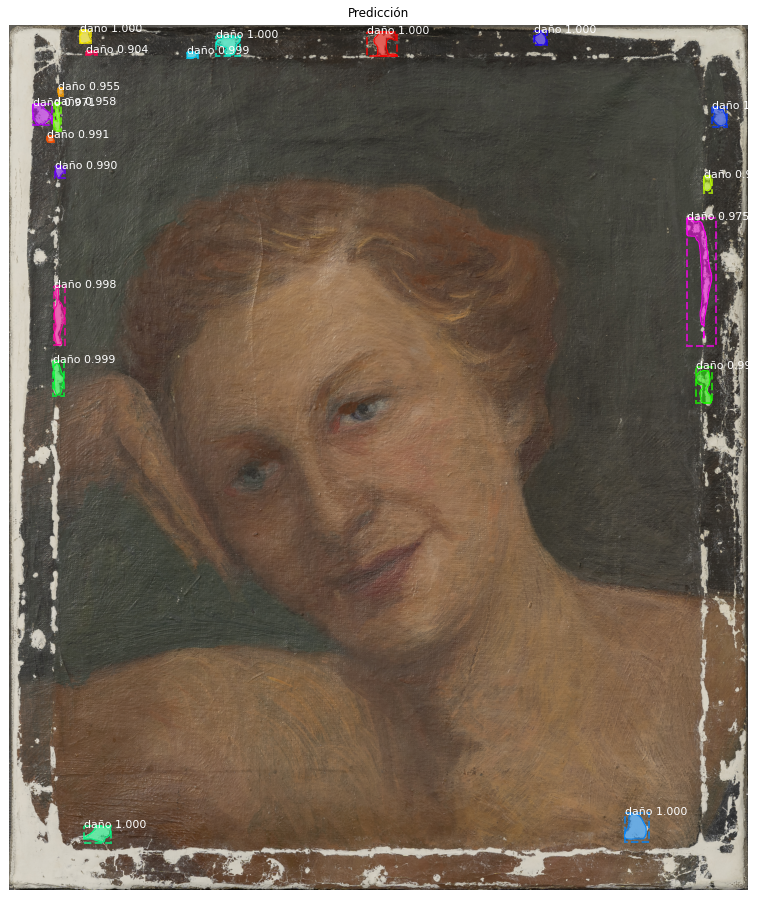

In [ ]:
import skimage
"""
real_test_dir = '/content/drive/MyDrive/TFG/imagenes/test/'
image_paths = []
for filename in os.listdir(real_test_dir):
    if os.path.splitext(filename)[1].lower() in ['.png', '.jpg', '.jpeg']:
      if filename == 'Pintura_0.14.jpg':
        image_paths.append(os.path.join(real_test_dir, filename))
"""
# Cargamos el peso
weights_path = "/content/mask_rcnn_daño_0005 (7).h5"
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

image_path = "/content/Pintura_0.2.jpg"
#for image_path in image_paths:
img = skimage.io.imread(image_path)
img_arr = np.array(img)
results = model.detect([img_arr], verbose=1)
#ax = get_ax(1)
r = results[0]

visualize.display_instances(img, r['rois'], r['masks'], r['class_ids'],dataset_train.class_names,
                            r['scores'], title="Predicción")

In [ ]:
%cd /content/Deteccion-Automatica-Pinturas
%matplotlib inline
# Ejecución de las pruebas
!python3 pruebas.py sprint1
#!python3 pruebas.py sprint2 --cuadro='Pintura_0.13.jpg'
#!python3 pruebas.py sprint3 --cuadro='Pintura_0.13.jpg'


/content/Deteccion-Automatica-Pinturas
Using TensorFlow backend.
Images value: 10
Classes: ['BG', 'daño']
Images train: 15
Classes: ['BG', 'daño']

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class

In [ ]:
#plt.save()
#plt.savefig(r"C:\Users\Andrea\Desktop\newimage.jpg", bbox_inches='tight')
#plt.savefig(r"C:\Users\Andrea\Desktop\newimage.jpg", bbox_inches='tight', dpi=300)